# Evidence

### Anecdotal evidence

For exmaple:
Topic: First babies are more likely to be late. 
“I don’t think that can be true because my sister was my mother’s first and she was early, as with many of my cousins.”

this type of evidence usually fails, because:

* Small number of observations: If pregnancy length is longer for first babies, the difference is probably small compared to natural variation. In that case, we might have to compare a large number of pregnancies to know whether there is a difference.

* Selection bias: People who join a discussion of this question might be interested because their first babies were late. In that case the process of selecting data would bias the results.

* Confirmation bias: People who believe the claim might be more likely to contribute examples that confirm it. People who doubt the claim are more likely to cite counterexamples.

* Inaccuracy: Anecdotes are often personal stories, and might be misremembered, misrepresented, repeated inaccurately, etc.

To address the limitations of anecdotes, we will use the tools of statistics, which include:

* Data collection: We will use data from a large national survey that was designed explicitly with the goal of generating statistically valid inferences about the U.S. population.

* Descriptive statistics: We will generate statistics that summarize the data concisely, and evaluate different ways to visualize data.

* Exploratory data analysis: We will look for patterns, differences, and other features that address the questions we are interested in. At the same time we will check for inconsistencies and identify limitations.

* Estimation: We will use data from a sample to estimate characteristics of the general population.

* Hypothesis testing: Where we see apparent effects, like a difference between two groups, we will evaluate whether the effect might have happened by chance.


# The National Survey of Family Growth

A stratified, oversampled cross-sectional study about 15-44 aged Hispanics, African-Americans and teenagers people in United States

Source: https://allendowney.github.io/ThinkStats/chap01.html

In [1]:
class CFG:
    folder_path= "datasets/nsfg/"

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statadict import parse_stata_dict

In [3]:
def download(url, path="datasets"):
    content = requests.get(url).content

    with open(f"{path + url.split('/')[-1]}", mode="wb") as file:
        file.write(content)

In [4]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct", path=CFG.folder_path)
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz", path=CFG.folder_path)

In [5]:
try:
    import statadict
except ImportError:
    %pip install statadict

In [6]:
dct_file = CFG.folder_path + "2002FemPreg.dct"
dat_file = CFG.folder_path + "2002FemPreg.dat.gz"

## Data Validation

In [7]:
def read_stata(dct_file, dat_file):
    stata_dict = parse_stata_dict(dct_file)
    resp = pd.read_fwf(
        dat_file,
        names=stata_dict.names,
        colspecs=stata_dict.colspecs,
        compression="gzip",
    )
    return resp

In [8]:
preg = read_stata(dct_file, dat_file)

In [9]:
preg.shape

(13593, 243)

In [10]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231


In [11]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'poverty_i', 'laborfor_i', 'religion_i', 'metro_i', 'basewgt',
       'adj_mod_basewgt', 'finalwgt', 'secu_p', 'sest', 'cmintvw'],
      dtype='object', length=243)

In [12]:
preg["outcome"].value_counts().sort_index()

outcome
1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: count, dtype: int64

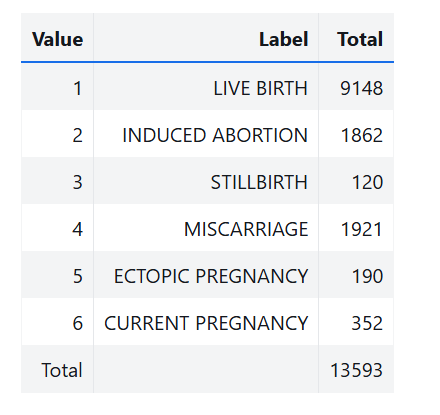

In [13]:
counts = preg["birthwgt_lb"].value_counts(dropna=False).sort_index()
counts

birthwgt_lb
0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
51.0       1
97.0       1
98.0       1
99.0      57
NaN     4449
Name: count, dtype: int64

In [14]:
# Replace > 51 lb weights to nan
preg["birthwgt_lb"] = preg["birthwgt_lb"].replace([51, 97, 98, 99], np.nan)

## Transformation

In [15]:
# Mother’s age at the end of the pregnancy 
# According to the codebook, it is an integer number of centiyears (hundredths of a year)
preg["agepreg"].mean()

2468.8151197039497

In [16]:
preg["agepreg"] /= 100.0
preg["agepreg"].mean()

24.6881511970395

In [17]:
preg["birthwgt_oz"].value_counts(dropna=False).sort_index()

birthwgt_oz
0.0     1037
1.0      408
2.0      603
3.0      533
4.0      525
5.0      535
6.0      709
7.0      501
8.0      756
9.0      505
10.0     475
11.0     557
12.0     555
13.0     487
14.0     475
15.0     378
97.0       1
98.0       1
99.0      46
NaN     4506
Name: count, dtype: int64

In [18]:
preg["birthwgt_oz"] = preg["birthwgt_oz"].replace([97, 98, 99], np.nan)

In [19]:
# Lbs + Ounce = Total Weight
preg["totalwgt_lb"] = preg["birthwgt_lb"] + preg["birthwgt_oz"] / 16.0
preg["totalwgt_lb"].mean()

7.265628457623368

## Summary Statistics

In [20]:
# Count
weights = preg["totalwgt_lb"]
n = weights.count()
n

9038

In [21]:
# Mean
mean = weights.sum() / n
# OR
weights.mean()

7.265628457623368

In [22]:
# Variance 
# Variance is a statistic that quantifies the spread of a set of values. 
# It is the mean of the squared deviations, which are the distances of each point from the mean.

squared_deviations = (weights - mean) ** 2
var = squared_deviations.sum() / n 
# OR n-1 division
weights.var()

1.9832904288326532

In [23]:
# Standard Deviation

std = np.sqrt(var)
# OR 
weights.std(ddof=0)

1.4082155338406195

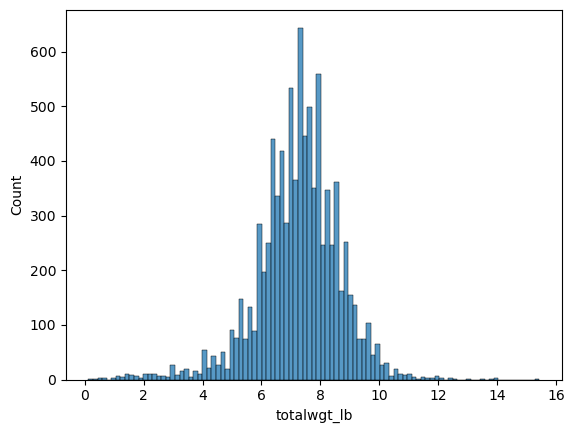

In [24]:
# Distribution
sns.histplot(data=weights)
plt.show()

## Interpretation

In [25]:
subset = preg.query("caseid == 10229")
subset.shape

(7, 244)

In [26]:
subset["outcome"].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Glossary

* anecdotal evidence: Data collected informally from a small number of individual cases, often without systematic sampling.

* cross-sectional study: A study that collects data from a representative sample of a population at a single point or interval in time.

* cycle: One data-collection interval in a study that collects data at multiple intervals in time.

* population: The entire group of individuals or items that is the subject of a study.

* sample: A subset of a population, often chosen at random.

* respondents: People who participate in a survey and respond to questions.

* representative: A sample is representative if it is similar to the population in ways that are important for the purposes of the study.

* stratified: A sample is stratified if it deliberately oversamples some groups, usually to make sure that enough members are included to support valid conclusions.

* oversampled: A group is oversampled if its members have a higher chance of appearing in a sample.

* variable: In survey data, a variable is a collection of responses to questions or values computed from responses.

* codebook: A document that describes the variables in a dataset, and provides other information about the data.

* recode: A variable that is computed based on other variables in a dataset.

* raw data: Data that has not been processed after collection.

* data cleaning: A process for identifying and correcting errors in a dataset, dealing with missing values, and computing recodes.

* statistic: A value that describes or summarizes a property of a sample.

* standard deviation: A statistic that quantifies the spread of data around the mean.

### 1.9.1. Exercise 1.1
Select the birthord column from preg, print the value counts, and compare to results published in the codebook at https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf.


In [27]:
preg["birthord"].value_counts(dropna=False)

birthord
NaN     4445
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: count, dtype: int64

### 1.9.2. Exercise 1.2
Create a new column named totalwgt_kg that contains birth weight in kilograms (there are approximately 2.2 pounds per kilogram). Compute the mean and standard deviation of the new column.


In [28]:
preg["totalwgt_kg"] = preg["totalwgt_lb"] / 2.2

In [29]:
preg.totalwgt_kg.mean()

3.302558389828803

In [30]:
preg.totalwgt_kg.std()

0.640133384349548

### 1.9.3. Exercise 1.3
What are the pregnancy lengths for the respondent with caseid 2298?

What was the birth weight of the first baby born to the respondent with caseid 5013? Hint: You can use and to check more than one condition in a query.

In [31]:
preg[preg["caseid"] == 2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [32]:
preg[(preg["caseid"] == 5013) & (preg["pregordr"] == 1)].prglngth
# OR 
preg.query("caseid==5013 & pregordr == 1").prglngth

5516    29
Name: prglngth, dtype: int64